<a href="https://colab.research.google.com/github/nathencinoza/pandas-movies-database/blob/main/Barplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Orga 2/notificacion-casos-vih-sexo-grupo-etario-2010-2019-argentina_1.csv', usecols = ['grupo_etario', 'sexo', 'casos_vih'],encoding = 'latin-1')
df.head(10)

,sexo,grupo_etario,casos_vih
0,ambos_sexos,total_grupo,7171
1,ambos_sexos,total_grupo,7206
2,ambos_sexos,total_grupo,7218
3,ambos_sexos,total_grupo,6522
4,ambos_sexos,total_grupo,6593
5,ambos_sexos,total_grupo,6202
6,ambos_sexos,total_grupo,4898
7,ambos_sexos,total_grupo,5087
8,ambos_sexos,total_grupo,4786
9,ambos_sexos,0 - 9,111


In [ ]:
df = df[df['grupo_etario'] != 'total_grupo']
df = df[df['sexo'] != 'ambos_sexos']
df.head(5)

,sexo,grupo_etario,casos_vih
99,mujeres,0 - 9,60
100,mujeres,0 - 9,60
101,mujeres,0 - 9,72
102,mujeres,0 - 9,54
103,mujeres,0 - 9,33


In [ ]:
df2 = df.groupby(['grupo_etario', 'sexo']).sum().groupby(['sexo']).apply(lambda x: 100 * x / x.sum()).reset_index().rename(columns = {'casos_vih':'porcentaje_casos_vih'})
df2.head(10)

,grupo_etario,sexo,porcentaje_casos_vih
0,0 - 9,mujeres,2.214671
1,0 - 9,varones,0.751451
2,10 - 14,mujeres,0.521444
3,10 - 14,varones,0.142517
4,15 - 19,mujeres,6.667448
5,15 - 19,varones,3.197554
6,20 - 24,mujeres,15.033982
7,20 - 24,varones,15.373653
8,25 - 34,mujeres,31.491680
9,25 - 34,varones,36.476472


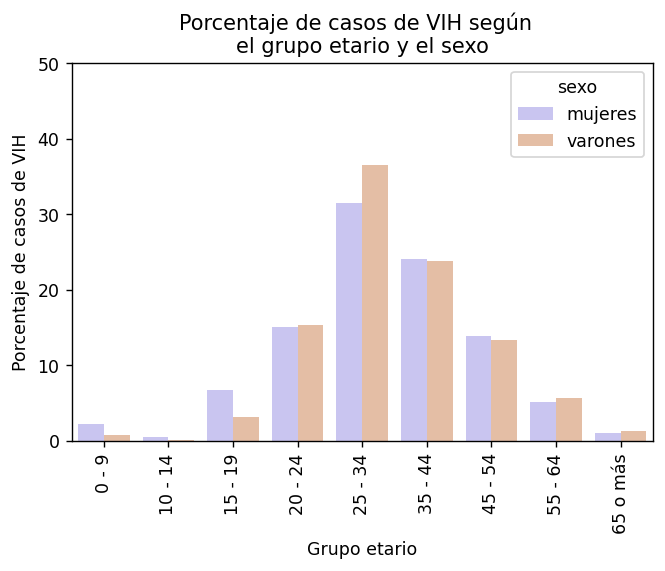

In [ ]:
plt.figure(dpi=125)
ax = sns.barplot(x = 'grupo_etario',
            y = 'porcentaje_casos_vih',
            hue = 'sexo',
            data = df2, palette=["#C3BEF7", "#EFBC9B"])
plt.xticks(rotation=90)
plt.title("Porcentaje de casos de VIH según  \nel grupo etario y el sexo")
plt.xlabel("Grupo etario")
plt.ylabel("Porcentaje de casos de VIH")
plt.ylim(0,50)
plt.show()
